In [35]:
!pip install --upgrade pandas
!pip install --upgrade pandas-datareader

import pandas_datareader as web
df = web.DataReader('CL=F', data_source='yahoo', start='2012-01-01' , end='2022-01-01' )
df


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,103.180000,99.650002,99.699997,102.959999,275481.0,102.959999
2012-01-04,103.739998,101.879997,102.989998,103.220001,271711.0,103.220001
2012-01-05,103.730003,101.300003,103.290001,101.809998,295615.0,101.809998
2012-01-06,102.800003,100.879997,101.349998,101.559998,290458.0,101.559998
2012-01-09,102.150002,100.099998,101.919998,101.309998,311866.0,101.309998
...,...,...,...,...,...,...
2021-12-27,76.089996,72.570000,73.379997,75.570000,268490.0,75.570000
2021-12-28,76.919998,75.529999,75.970001,75.980003,249728.0,75.980003
2021-12-29,77.370003,75.360001,76.040001,76.559998,283557.0,76.559998


In [36]:
#Get the number of rows and columns in the data set
df.shape

(2516, 6)

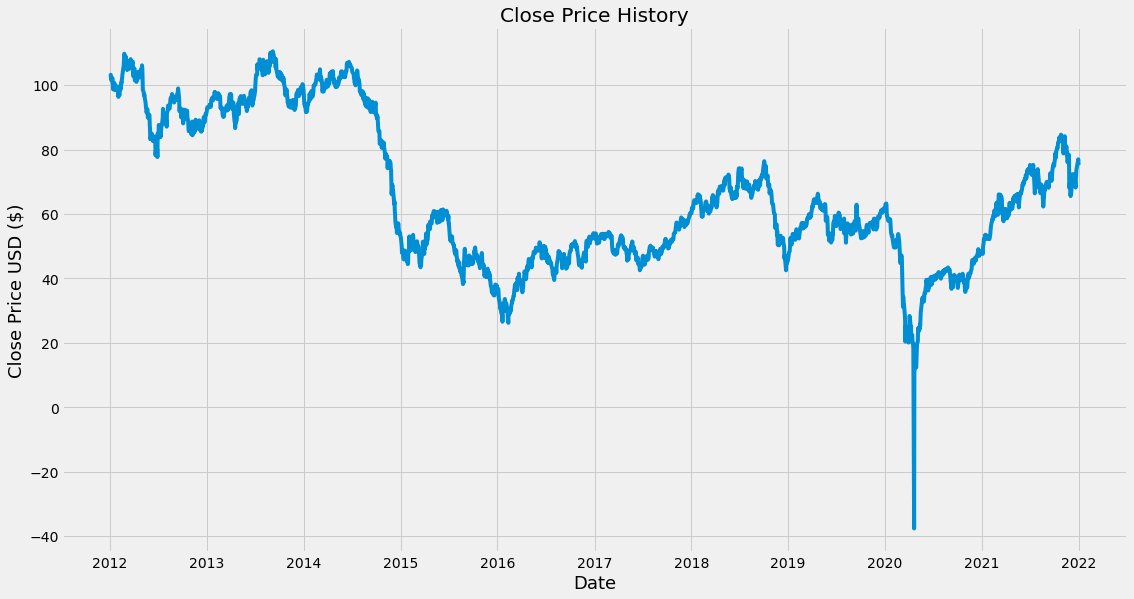

In [37]:
import matplotlib.pyplot as plt
#visualize the closing price history
plt.figure(figsize=(17,9))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [38]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
import requests
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
#Create a new dataframe with only the 'Close' column
data = df.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the numeber of rows to train the model on 
training_data_len = math.ceil( len(dataset) * .8)
training_data_len


2013

In [39]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.94890659],
       [0.95066146],
       [0.9411447 ],
       ...,
       [0.77072083],
       [0.7736231 ],
       [0.76160907]])

In [40]:
#Create the training dataset
#Create the scaled training data set
train_data = scaled_data[0:training_data_len, :]
#Split te data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<= 61:
    print(x_train)
    print(y_train)
    print()

[array([0.94890659, 0.95066146, 0.9411447 , 0.93945734, 0.93776997,
       0.94404697, 0.93480024, 0.92285367, 0.92015388, 0.9337203 ,
       0.93291035, 0.93156048, 0.91853402, 0.92609343, 0.92184124,
       0.92487853, 0.92690334, 0.92595842, 0.92069384, 0.91866904,
       0.91279699, 0.90436016, 0.91434934, 0.90807239, 0.91819658,
       0.92022138, 0.92784826, 0.9199514 , 0.93507023, 0.93392278,
       0.94107724, 0.94451943, 0.95079643, 0.96834502, 0.97131479,
       0.98177648, 0.9948704 , 0.98670356, 0.97313718, 0.97664687,
       0.9885934 , 0.97414956, 0.97428457, 0.96065064, 0.97050489,
       0.97333965, 0.97887421, 0.97171975, 0.97421706, 0.96557776,
       0.96341794, 0.97657937, 0.9835313 , 0.96679267, 0.97799675,
       0.96503779, 0.975297  , 0.97637689, 0.97840175, 0.9654428 ])]
[0.9476916846113552]

[array([0.94890659, 0.95066146, 0.9411447 , 0.93945734, 0.93776997,
       0.94404697, 0.93480024, 0.92285367, 0.92015388, 0.9337203 ,
       0.93291035, 0.93156048, 0.918

In [41]:
#Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train),np.array(y_train)


In [42]:
#Reshape the data
x_train= np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1953, 60, 1)

In [43]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences= True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))



In [44]:
#Compile the model
model.compile(optimizer= 'adam', loss='mean_squared_error' )

In [45]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)


1953/1953 [==============================] - 62s 30ms/step - loss: 9.5567e-04


In [46]:
#Create the testing data set
#Create a new array containing scaled values from index 1543 to 2003
test_data = scaled_data[training_data_len - 60: , : ]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])




In [47]:
#Convert the data to a numpy array
x_test = np.array(x_test)

In [48]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [49]:
#Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


In [50]:
#Get the root mean squared error (RMSE)
rmse = np.sqrt( np.mean( predictions - y_test)**2 )
rmse 

0.9338650466433577

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


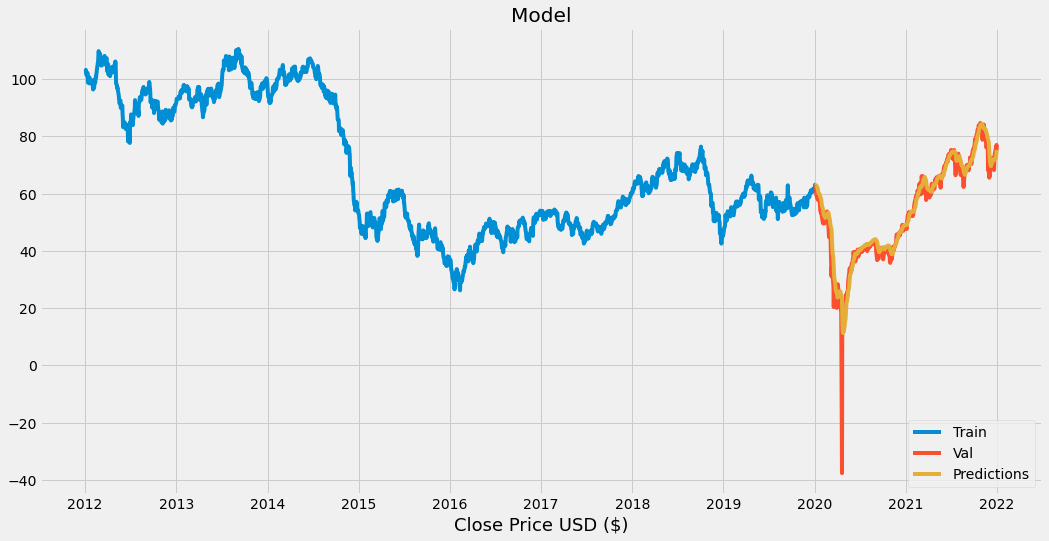

In [51]:
#Plot the data 
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions']= predictions
#Visualize the data 
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Data', fontsize= 18)
plt.xlabel('Close Price USD ($)', fontsize= 18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [52]:
#Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2020-01-07,62.700001,62.663498
2020-01-08,59.610001,62.911598
2020-01-09,59.560001,62.795742
2020-01-10,59.040001,62.499226
2020-01-13,58.080002,62.077801
...,...,...
2021-12-27,75.570000,72.284714
2021-12-28,75.980003,72.911232
2021-12-29,76.559998,73.656075


In [53]:
#Get the quote 
apple_quote = web.DataReader('CL=F', data_source='yahoo', start='2012-01-01', end='2019-12-17')
#Create a new dataframe
new_df = apple_quote.filter(['Close'])
#Get the last 60 days closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 to 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test= []
#Append the past 60 days
X_test.append(last_60_days_scaled)
#Convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)




[[60.385307]]


In [54]:
#Get the quote
apple_quote2 = web.DataReader('CL=F', data_source='yahoo', start='2019-12-18', end='2019-12-18')
print(apple_quote2['Close'])


Date
2019-12-18    60.93
Name: Close, dtype: float64
